<a href="https://colab.research.google.com/github/AbhishekShaju/TASK/blob/main/TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
# After uploading, you can load the file normally
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")

In [ ]:

import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])


In [ ]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-letters
    return text.lower()


In [ ]:
df['clean_review'] = df['review'].apply(preprocess_text)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['label'], test_size=0.2, random_state=42)


In [ ]:
count_vect = CountVectorizer(max_features=5000, ngram_range=(1,2))
X_train_bow = count_vect.fit_transform(X_train)
X_test_bow = count_vect.transform(X_test)

tfidf_vect = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Bag-of-Words: {'C': 0.1, 'solver': 'liblinear'}
Bag-of-Words Accuracy: 0.8897

Classification Report for Bag-of-Words:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.89      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



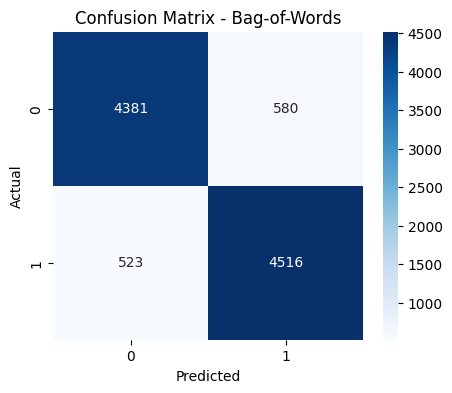

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for TF-IDF: {'C': 1, 'solver': 'lbfgs'}
TF-IDF Accuracy: 0.8973

Classification Report for TF-IDF:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



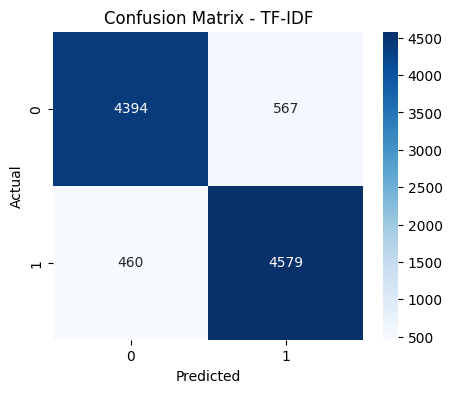

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

def train_and_evaluate(X_train_vec, X_test_vec, y_train, y_test, vectorizer_name):
    grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, n_jobs=-1, verbose=1)
    grid.fit(X_train_vec, y_train)

    print(f"Best parameters for {vectorizer_name}: {grid.best_params_}")

    preds = grid.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)

    print(f"{vectorizer_name} Accuracy: {acc:.4f}\n")
    print(f"Classification Report for {vectorizer_name}:\n", classification_report(y_test, preds))

    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {vectorizer_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train and evaluate BoW model
train_and_evaluate(X_train_bow, X_test_bow, y_train, y_test, "Bag-of-Words")

# Train and evaluate TF-IDF model
train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")